<a href="https://colab.research.google.com/github/saravanapandi840/NAAN-MUDHALVAN/blob/main/Forecasting%20House%20Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload the 'Housing_First_50_Rows.csv' file...


Saving Housing_First_50_Rows (1).csv to Housing_First_50_Rows (1).csv
Reading uploaded file: Housing_First_50_Rows (1).csv
First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no 

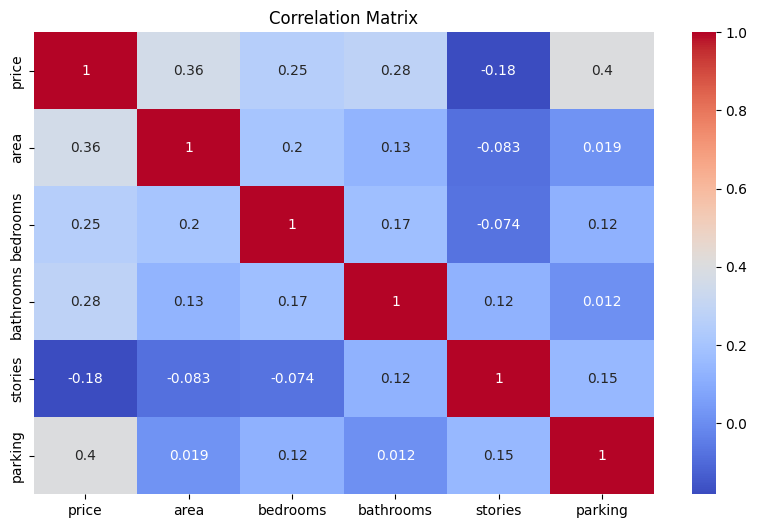

Pairplot of selected features vs price:


KeyError: "['sqft_living'] not in index"

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Please upload the 'Housing_First_50_Rows.csv' file...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print("Reading uploaded file:", filename)
df = pd.read_csv(filename)
print("First 5 rows of the dataset:")
print(df.head())

print("Dataset information:")
print(df.info())

print("Descriptive statistics:")
print(df.describe())

print("Checking for missing values:")
print(df.isnull().sum())
df = df.dropna()
print("Remaining rows after dropping missing values:", len(df))

print("Plotting correlation matrix:")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

print("Pairplot of selected features vs price:")
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()

print("Selecting features and target variable...")
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
y = df['price']
print("Feature matrix (X):")
print(X.head())
print("Target vector (y):")
print(y.head())

print("Splitting into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

print("Training Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)
print("Model coefficients:")
print(model.coef_)
print("Model intercept:")
print(model.intercept_)

print("Making predictions on test data...")
y_pred = model.predict(X_test)
print("First 5 predictions:")
print(y_pred[:5])

print("Evaluating model performance...")
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

print("Plotting Actual vs Predicted Prices...")
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()